In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot  as plt

In [6]:
df = pd.read_csv('data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head(5)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


so, normalization is used where we are using scales like grams, mililiters etc....

we will visualize the probability distribution function (pdf) of Alcohol and Malic acid 

Text(0.5, 1.0, 'Malic acid')

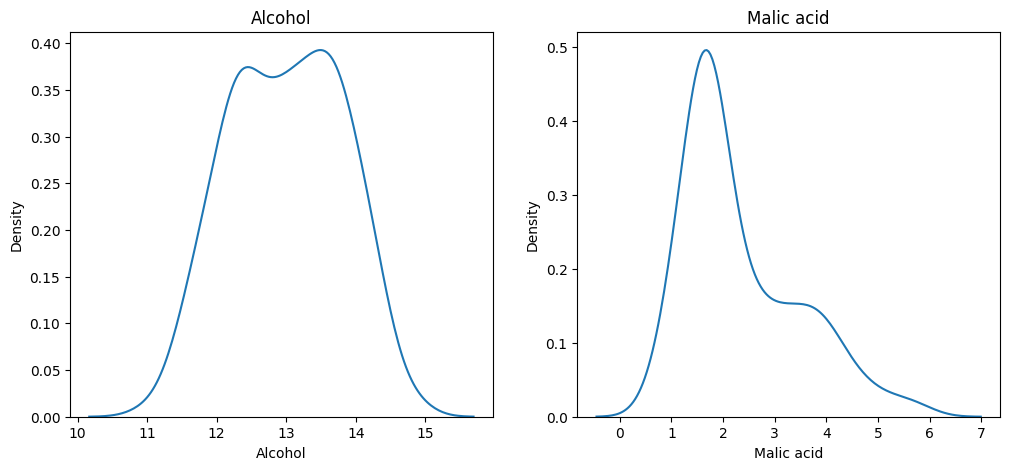

In [13]:
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.kdeplot(df['Alcohol'] , ax=ax1)
ax1.set_title('Alcohol')
sns.kdeplot(df['Malic acid'], ax=ax2)
ax2.set_title('Malic acid')



<Axes: xlabel='Alcohol', ylabel='Malic acid'>

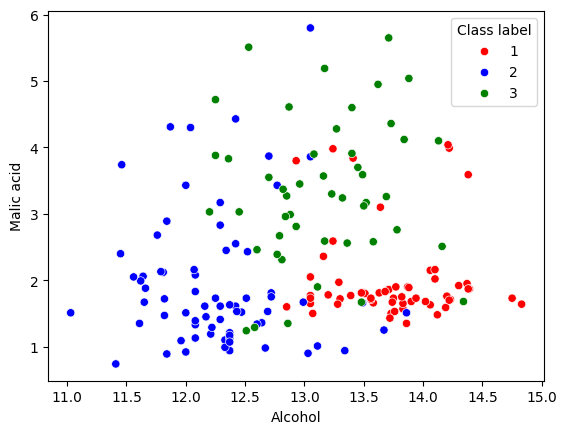

In [16]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df , x ='Alcohol',y = 'Malic acid',hue=df['Class label'],palette=color_dict)

In [18]:
x= df.drop('Class label',axis=1)
y = df['Class label']

In [19]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [20]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

# Noramalization

# Min/max scalling

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [25]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


so, in min/max scaler all the values is scaled down between [0,1]. so, as we can see the max is 1 and min is 0 

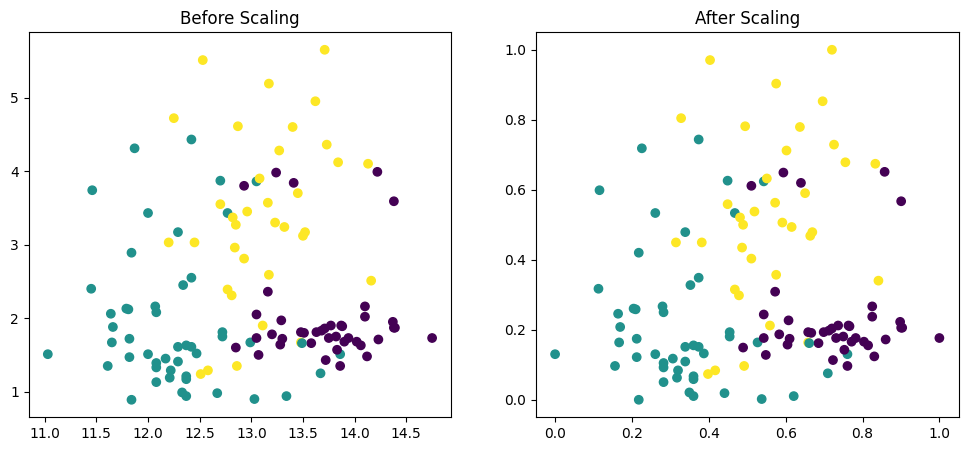

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

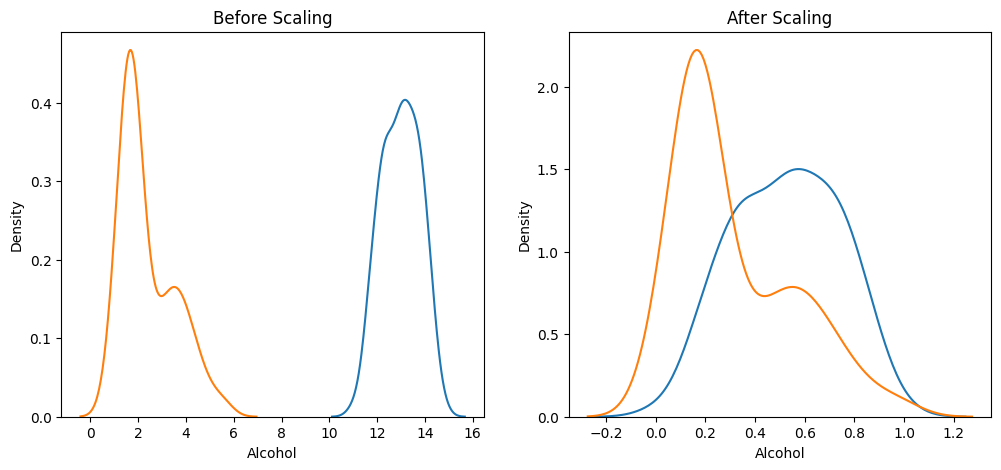

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

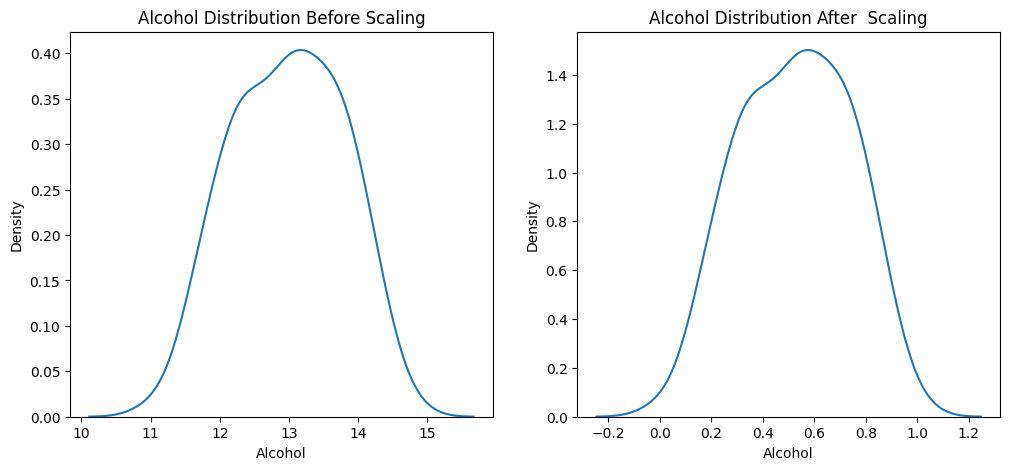

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After  Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

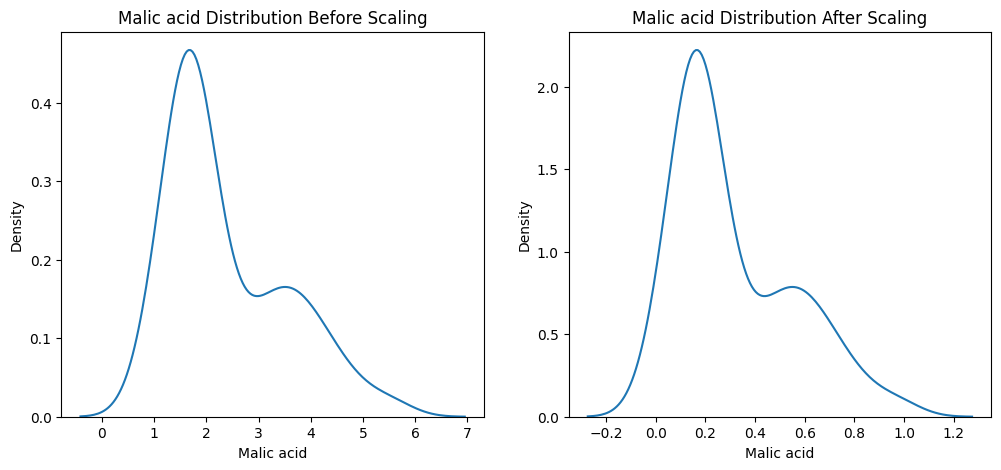

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()